In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train = pd.read_csv('input/train.csv',dtype={'WindSpeed': 'object'})

In [8]:
train.head()

,GameId,PlayId,Team,X,Y,S,A,Dis,Orientation,Dir,...,Week,Stadium,Location,StadiumType,Turf,GameWeather,Temperature,Humidity,WindSpeed,WindDirection
0,2017090700,20170907000118,away,73.91,34.84,1.69,1.13,0.40,81.99,177.18,...,1,Gillette Stadium,"Foxborough, MA",Outdoor,Field Turf,Clear and warm,63.0,77.0,8,SW
1,2017090700,20170907000118,away,74.67,32.64,0.42,1.35,0.01,27.61,198.70,...,1,Gillette Stadium,"Foxborough, MA",Outdoor,Field Turf,Clear and warm,63.0,77.0,8,SW
2,2017090700,20170907000118,away,74.00,33.20,1.22,0.59,0.31,3.01,202.73,...,1,Gillette Stadium,"Foxborough, MA",Outdoor,Field Turf,Clear and warm,63.0,77.0,8,SW
3,2017090700,20170907000118,away,71.46,27.70,0.42,0.54,0.02,359.77,105.64,...,1,Gillette Stadium,"Foxborough, MA",Outdoor,Field Turf,Clear and warm,63.0,77.0,8,SW
4,2017090700,20170907000118,away,69.32,35.42,1.82,2.43,0.16,12.63,164.31,...,1,Gillette Stadium,"Foxborough, MA",Outdoor,Field Turf,Clear and warm,63.0,77.0,8,SW


In [4]:
train['Location'].unique()

array(['Foxborough, MA', 'Orchard Park NY', 'Chicago. IL',
       'Cincinnati, Ohio', 'Cleveland, Ohio', 'Detroit, MI',
       'Houston, Texas', 'Nashville, TN', 'Landover, MD',
       'Los Angeles, Calif.', 'Green Bay, WI', 'Santa Clara, CA',
       'Arlington, Texas', 'Minneapolis, MN', 'Denver, CO',
       'Baltimore, Md.', 'Charlotte, North Carolina',
       'Indianapolis, Ind.', 'Jacksonville, FL', 'Kansas City, MO',
       'New Orleans, LA', 'Pittsburgh', 'Tampa, FL', 'Carson, CA',
       'Oakland, CA', 'Seattle, WA', 'Atlanta, GA', 'East Rutherford, NJ',
       'London, England', 'Chicago, IL', 'Detroit', 'Philadelphia, Pa.',
       'Glendale, AZ', 'Cleveland, OH', 'Foxborough, Ma',
       'E. Rutherford, NJ', 'Miami Gardens, Fla.', 'Houston, TX',
       'London', 'New Orleans, La.', 'Mexico City', 'Baltimore, Maryland',
       'Arlington, TX', 'Jacksonville, Fl', 'Jacksonville, Florida',
       'Pittsburgh, PA', 'Charlotte, NC', 'Cleveland,Ohio',
       'East Rutherford, N.J.',

In [9]:
print(train.columns)
print(len(train.columns))

Index(['GameId', 'PlayId', 'Team', 'X', 'Y', 'S', 'A', 'Dis', 'Orientation',
       'Dir', 'NflId', 'DisplayName', 'JerseyNumber', 'Season', 'YardLine',
       'Quarter', 'GameClock', 'PossessionTeam', 'Down', 'Distance',
       'FieldPosition', 'HomeScoreBeforePlay', 'VisitorScoreBeforePlay',
       'NflIdRusher', 'OffenseFormation', 'OffensePersonnel',
       'DefendersInTheBox', 'DefensePersonnel', 'PlayDirection', 'TimeHandoff',
       'TimeSnap', 'Yards', 'PlayerHeight', 'PlayerWeight', 'PlayerBirthDate',
       'PlayerCollegeName', 'Position', 'HomeTeamAbbr', 'VisitorTeamAbbr',
       'Week', 'Stadium', 'Location', 'StadiumType', 'Turf', 'GameWeather',
       'Temperature', 'Humidity', 'WindSpeed', 'WindDirection'],
      dtype='object')
49


In [10]:
print(len(train['Team'].unique()))
train['Team'].unique()

2


array(['away', 'home'], dtype=object)

In [5]:
train['Dis'].unique()

array([0.4 , 0.01, 0.31, 0.02, 0.16, 0.18, 0.13, 0.28, 0.51, 0.55, 0.19,
       0.32, 0.  , 0.59, 0.38, 0.17, 0.22, 0.24, 0.2 , 0.34, 0.08, 0.26,
       0.45, 0.5 , 0.06, 0.44, 0.41, 0.37, 0.12, 0.35, 0.3 , 0.49, 0.33,
       0.48, 0.6 , 0.47, 0.39, 0.15, 0.25, 0.43, 0.1 , 0.46, 0.09, 0.29,
       0.21, 0.52, 0.07, 0.23, 0.53, 0.14, 0.54, 0.64, 0.27, 0.36, 0.83,
       0.56, 0.11, 0.62, 0.05, 0.69, 0.63, 0.78, 0.58, 0.66, 0.61, 0.42,
       0.74, 0.57, 0.03, 0.72, 0.04, 0.65, 0.85, 0.67, 0.68, 0.7 , 0.71,
       0.73, 0.8 , 0.81, 0.77, 1.39, 0.94, 0.79, 0.76, 0.91, 0.88, 0.82,
       0.75, 0.84, 1.16, 0.9 , 0.89, 0.86, 0.87, 0.92, 1.13, 1.1 , 1.24,
       0.99, 1.02, 1.09, 0.95, 1.  , 0.93])

In [16]:
# orientation??
print(len(train['Orientation'].unique()))
train['Orientation'].sort_values().unique()

36002


array([0.0000e+00, 1.0000e-02, 2.0000e-02, ..., 3.5999e+02, 3.6000e+02,
              nan])

360.0


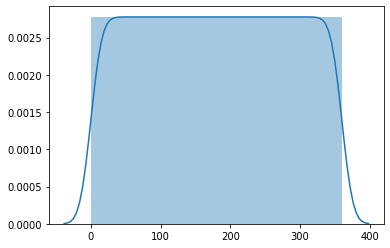

In [61]:
# maybe to phi or something is possible
def rep(a):
    return np.nan_to_num(a)
a = list(train['Dir'].unique())

sns.distplot(list(map(rep, a)))

print(max(a))


In [64]:
#  a unique identifier of the player
print(len(train['NflId'].unique()))
train['NflId'].unique()

2231


array([ 496723, 2495116, 2495493, ..., 2553706, 2559264, 2558095],
      dtype=int64)

In [63]:
print(len(train['DisplayName'].unique()))
train['DisplayName'].unique()
# what's wrong with ... mismatch b/w name and id

2230


array(['Eric Berry', 'Allen Bailey', 'Justin Houston', ...,
       'Ryan Delaire', 'Pasoni Tasini', 'Malachi Dupre'], dtype=object)

99
Counter({21: 11158, 23: 10072, 90: 9164, 26: 9115, 24: 8899, 77: 8630, 98: 8613, 94: 8375, 71: 8205, 93: 8023, 22: 8010, 20: 7944, 97: 7819, 99: 7755, 25: 7626, 54: 7589, 73: 7481, 11: 7442, 75: 7358, 10: 7303, 76: 7237, 55: 7218, 72: 7199, 29: 7064, 27: 7057, 65: 7038, 70: 6828, 74: 6805, 95: 6717, 91: 6685, 50: 6649, 68: 6608, 53: 6462, 51: 6038, 13: 5995, 87: 5868, 96: 5737, 66: 5716, 79: 5715, 31: 5710, 52: 5678, 17: 5666, 84: 5656, 58: 5656, 28: 5560, 92: 5446, 12: 5410, 59: 5369, 69: 5313, 30: 5152, 32: 5018, 78: 5018, 56: 4955, 60: 4904, 64: 4696, 88: 4623, 57: 4512, 82: 4472, 67: 4469, 33: 4438, 61: 4356, 89: 4340, 41: 4328, 14: 4263, 18: 4261, 80: 4124, 85: 4089, 62: 4073, 81: 4045, 38: 3926, 42: 3903, 83: 3566, 19: 3560, 36: 3447, 15: 3396, 34: 3263, 44: 3172, 86: 3121, 16: 3105, 37: 2961, 43: 2930, 48: 2731, 47: 2596, 4: 2546, 35: 2392, 39: 2277, 7: 2252, 3: 2147, 63: 2117, 8: 1949, 5: 1881, 9: 1820, 40: 1612, 45: 1608, 46: 1156, 49: 1112, 2: 997, 6: 810, 1: 592})


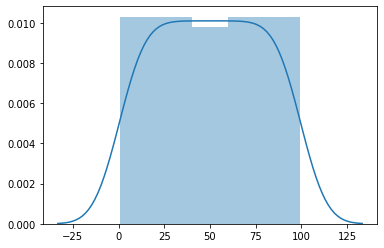

In [76]:
import collections
print(len(train['JerseyNumber'].unique()))
train['JerseyNumber'].unique()

print(collections.Counter(train['JerseyNumber']))

sns.distplot(train['JerseyNumber'].unique())

In [77]:
train['Season'].unique()

array([2017, 2018], dtype=int64)

[35 43  2 25 29 19 10 50  9 30 12  8 45 18 22 48 36 20 11  7 23 37 40  4
 28 46 14  1  5 13 15 49 21 42 33 32 34 31 41 38 17 47 26  6 44 39 24 16
  3 27]


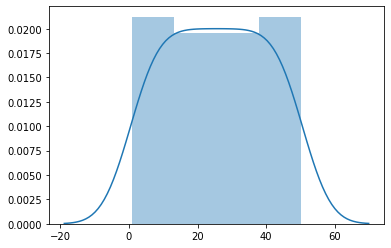

In [80]:
# the yard line of the line of scrimmage
## meaning?
print(train['YardLine'].unique())

sns.distplot(train['YardLine'].unique())

In [81]:
# 5 >> 연장
print(train['Quarter'].unique())

array([1, 2, 3, 4, 5], dtype=int64)

In [84]:
# 오전 오후 or 쿼터로 합치기 
## 시간은 아닌듯.. 쿼터당 시간인듯(15이상 값이 없는 걸로 봐서 풋볼이 15분겜예상)
train['GameClock'].unique()

# sns.distplot(train['Quarter'].unique())

array(['14:14:00', '13:52:00', '13:02:00', '12:12:00', '12:08:00',
       '11:21:00', '10:34:00', '09:34:00', '09:25:00', '06:34:00',
       '03:47:00', '03:03:00', '01:36:00', '00:37:00', '00:23:00',
       '14:44:00', '13:17:00', '12:49:00', '11:23:00', '09:57:00',
       '09:17:00', '08:38:00', '08:15:00', '07:31:00', '07:22:00',
       '06:11:00', '05:29:00', '03:44:00', '02:29:00', '15:00:00',
       '10:53:00', '10:23:00', '09:13:00', '07:55:00', '07:08:00',
       '05:35:00', '05:03:00', '04:21:00', '02:31:00', '02:00:00',
       '00:57:00', '00:04:00', '12:29:00', '10:28:00', '10:00:00',
       '08:20:00', '05:19:00', '04:15:00', '04:05:00', '02:44:00',
       '02:37:00', '02:32:00', '14:52:00', '12:48:00', '12:15:00',
       '11:35:00', '10:33:00', '09:40:00', '06:13:00', '01:57:00',
       '00:20:00', '14:30:00', '13:22:00', '06:16:00', '05:48:00',
       '04:44:00', '03:55:00', '02:38:00', '02:10:00', '14:54:00',
       '12:00:00', '10:41:00', '09:05:00', '08:05:00', '06:52:

In [85]:
print(len(train['PossessionTeam'].unique()))
print(train['PossessionTeam'].unique())

32
['NE' 'KC' 'BUF' 'NYJ' 'ATL' 'CHI' 'CIN' 'BLT' 'CLV' 'PIT' 'ARZ' 'DET'
 'JAX' 'HST' 'OAK' 'TEN' 'WAS' 'PHI' 'LA' 'IND' 'SEA' 'GB' 'CAR' 'SF'
 'DAL' 'NYG' 'NO' 'MIN' 'DEN' 'LAC' 'TB' 'MIA']


In [3]:
print(len(train['HomeTeamAbbr'].unique()))
print(sorted(train['HomeTeamAbbr'].unique()))

# 이 부분이 home team name이랑 다르다는 얘기인듯
print(list(sorted(train['HomeTeamAbbr'].unique()))==sorted(list(train['PossessionTeam'].unique())))

32
['ARI', 'ATL', 'BAL', 'BUF', 'CAR', 'CHI', 'CIN', 'CLE', 'DAL', 'DEN', 'DET', 'GB', 'HOU', 'IND', 'JAX', 'KC', 'LA', 'LAC', 'MIA', 'MIN', 'NE', 'NO', 'NYG', 'NYJ', 'OAK', 'PHI', 'PIT', 'SEA', 'SF', 'TB', 'TEN', 'WAS']
False


In [125]:
print(len(train['VisitorTeamAbbr'].unique()))
print(train['VisitorTeamAbbr'].unique())

# poss팀이랑은 다른데 홈팀이랑은 같네?
print(list(sorted(train['HomeTeamAbbr'].unique()))==sorted(list(train['VisitorTeamAbbr'].unique())))

32
['KC' 'NYJ' 'ATL' 'BAL' 'PIT' 'ARI' 'JAX' 'OAK' 'PHI' 'IND' 'SEA' 'CAR'
 'NYG' 'NO' 'LAC' 'HOU' 'CLE' 'BUF' 'TEN' 'NE' 'MIN' 'CHI' 'MIA' 'DAL'
 'WAS' 'SF' 'GB' 'DET' 'LA' 'DEN' 'TB' 'CIN']
True


4
[3 1 2 4]


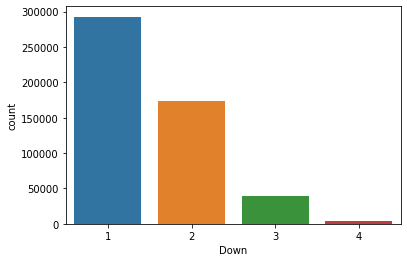

In [102]:
print(len(train['Down'].unique()))
print(train['Down'].unique())

sns.countplot(train['Down'])

35
[ 2 10  7  1  9  5  6 14  8 12  3  4 15 21 17 20 13 16 11 23 19 26 24 18
 25 30 31 28 27 40 35 33 22 34 29]


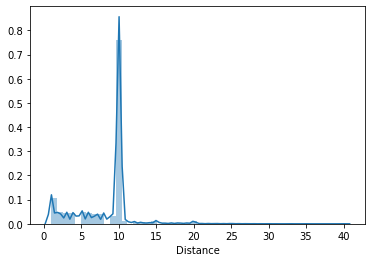

In [103]:
print(len(train['Distance'].unique()))
print(train['Distance'].unique())

sns.distplot(train['Distance'])

In [104]:
# position 정보 필요
print(len(train['FieldPosition'].unique()))
print(train['FieldPosition'].unique())

33
['NE' 'KC' nan 'BUF' 'NYJ' 'ATL' 'CHI' 'CIN' 'BLT' 'CLV' 'PIT' 'ARZ' 'DET'
 'JAX' 'HST' 'TEN' 'OAK' 'WAS' 'PHI' 'LA' 'IND' 'GB' 'SEA' 'CAR' 'SF'
 'DAL' 'NYG' 'NO' 'MIN' 'DEN' 'LAC' 'TB' 'MIA']


50
[ 0  7 10 17 24 27 14 21  3 18  6  9 15 35 13 16 37 39 46 19 26 29 20 23
 28 42 45 12 31 34 33 30 44 54 57 22 32  2 52 38 40 51  8 47 36 11 48 25
 41 43]


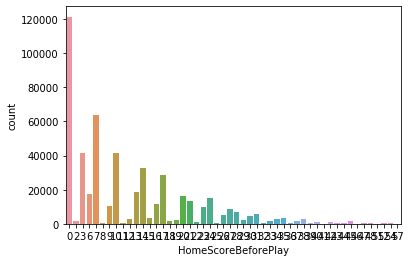

In [106]:
# 시작전 홈팀 스코어면  그 순간 이기고 있냐 지고 있냐 얘기인가?
## 음의 값이 없다는건.. 아래꺼와 같이 이기고 있냐 지고 있냐 판단해서 변수 포함 ?!
print(len(train['HomeScoreBeforePlay'].unique()))
print(train['HomeScoreBeforePlay'].unique())

sns.countplot(train['HomeScoreBeforePlay'])

45
[ 0  7 14 21 28 35 42  3  6 12 10 13 20 17 23 19 26 29 16  9 30 37 27 33
 36 24 34 41 31 32  2  8 15 18 22 39 38 40 25 48 51 11 45  5 44]


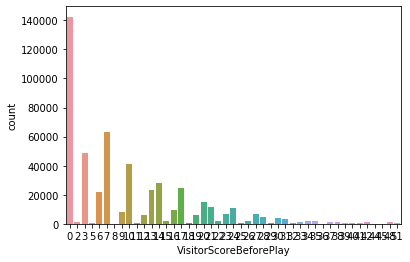

In [109]:
print(len(train['VisitorScoreBeforePlay'].unique()))
print(train['VisitorScoreBeforePlay'].unique())

sns.countplot(train['VisitorScoreBeforePlay'])

In [110]:
# rushing play는 잘한단 뜻인가? 아니면 그 경기에서 뛰는 놈 말하는 건가?
print(len(train['NflIdRusher'].unique()))
print(train['NflIdRusher'].unique())

371
[2543773 2539663 2557917 2539265 2530515 2556214 2543638 2495469 2550268
   79607 2507428 2495328     234 2543583 2552453 2555418 2558250 2552636
 2543603 2543664 2552631    4327 2557976 2540156 2550163 2550189 2557987
 2540175 2557978 2553435 2552374 2540020 2556118 2539980 2543847  497326
 2557973 2533034 2555234 2507999 2557994 2540225 2495663 2495207 2540145
 2556075 2555464 2556885 2540011 2556414  497149 2555461 2506467 2552475
 2506404 2558123 2539336 2555334 2552382 2533460 2559163 2540168 2552429
 2558204 2555417 2558865     949 2543743 2558918 2540037 2557997 2540230
 2555224 2555460 2533457 2550481 2555295 2507164 2558019 2495466 2506147
 2557991 2543715 2507166 2541161 2552608 2540269 2552469 2550658     925
 2558010 2556519 2552461 2555430 2552468     262 2555261 2539217 2557870
 2553650 2495966 2552464 2550289 2550272 2543498 2552424 2543572 2556803
 2553617 2495471 2543770 2556466 2552582 2543488 2555230 2555220 2557934
 2553743 2558138 2532820 2553733 2532975 255061

In [111]:
# nan처리
print(len(train['OffenseFormation'].unique()))
print(train['OffenseFormation'].unique())

9
['SHOTGUN' 'SINGLEBACK' 'JUMBO' 'PISTOL' 'I_FORM' 'ACE' 'WILDCAT' nan
 'EMPTY']


In [112]:
# 공격전술인듯?
print(len(train['OffensePersonnel'].unique()))
print(train['OffensePersonnel'].unique())

56
['1 RB, 1 TE, 3 WR' '6 OL, 2 RB, 2 TE, 0 WR' '1 RB, 3 TE, 1 WR'
 '1 RB, 2 TE, 2 WR' '6 OL, 1 RB, 2 TE, 1 WR' '2 RB, 1 TE, 2 WR'
 '2 RB, 2 TE, 1 WR' '0 RB, 3 TE, 2 WR' '0 RB, 1 TE, 4 WR'
 '6 OL, 1 RB, 0 TE, 3 WR' '6 OL, 1 RB, 1 TE, 2 WR' '1 RB, 2 TE, 1 WR,1 DL'
 '1 RB, 3 TE, 0 WR,1 DL' '1 RB, 0 TE, 4 WR' '1 RB, 1 TE, 2 WR,1 DL'
 '6 OL, 2 RB, 0 TE, 2 WR' '2 RB, 0 TE, 3 WR' '6 OL, 2 RB, 1 TE, 1 WR'
 '7 OL, 1 RB, 0 TE, 2 WR' '7 OL, 2 RB, 0 TE, 1 WR'
 '7 OL, 1 RB, 2 TE, 0 WR' '2 RB, 3 TE, 0 WR' '3 RB, 1 TE, 1 WR'
 '6 OL, 1 RB, 3 TE, 0 WR' '6 OL, 1 RB, 2 TE, 0 WR,1 DL' '2 RB, 3 TE, 1 WR'
 '6 OL, 1 RB, 1 TE, 1 WR,1 DL' '1 RB, 4 TE, 0 WR' '1 RB, 2 TE, 1 WR,1 LB'
 '1 RB, 3 TE, 0 WR,1 LB' '7 OL, 2 RB, 1 TE, 0 WR' '0 RB, 2 TE, 3 WR'
 '1 RB, 0 TE, 3 WR,1 DB' '6 OL, 1 RB, 2 TE, 0 WR,1 LB'
 '1 RB, 1 TE, 2 WR,1 DB' '0 RB, 0 TE, 5 WR' '1 RB, 2 TE, 3 WR'
 '1 RB, 1 TE, 2 WR,1 LB' '1 RB, 3 TE, 0 WR,1 DB'
 '6 OL, 2 RB, 1 TE, 0 WR,1 DL' '2 QB, 1 RB, 1 TE, 2 WR'
 '6 OL, 0 RB, 2 TE, 2 WR' '3 RB, 0 TE, 2 W

In [114]:
# nan처리 >> 0
print(len(train['DefendersInTheBox'].unique()))
print(train['DefendersInTheBox'].unique())

12
[ 6.  7.  9.  5.  8. 11. 10.  4.  3. nan  2.  1.]


In [116]:
# 수비 전술
print(len(train['DefensePersonnel'].unique()))
print(train['DefensePersonnel'].unique())

38
['2 DL, 3 LB, 6 DB' '4 DL, 4 LB, 3 DB' '3 DL, 2 LB, 6 DB'
 '3 DL, 4 LB, 4 DB' '3 DL, 3 LB, 5 DB' '4 DL, 3 LB, 4 DB'
 '4 DL, 1 LB, 6 DB' '4 DL, 2 LB, 5 DB' '5 DL, 2 LB, 4 DB'
 '2 DL, 4 LB, 5 DB' '2 DL, 5 LB, 4 DB' '5 DL, 4 LB, 2 DB'
 '1 DL, 5 LB, 5 DB' '5 DL, 3 LB, 3 DB' '6 DL, 2 LB, 3 DB'
 '3 DL, 5 LB, 3 DB' '6 DL, 3 LB, 2 DB' '1 DL, 3 LB, 7 DB'
 '2 DL, 2 LB, 7 DB' '4 DL, 5 LB, 2 DB' '1 DL, 4 LB, 6 DB'
 '4 DL, 5 LB, 1 DB, 1 OL' '6 DL, 1 LB, 4 DB' '2 DL, 4 LB, 4 DB, 1 OL'
 '6 DL, 4 LB, 1 DB' '5 DL, 1 LB, 5 DB' '4 DL, 6 LB, 1 DB'
 '0 DL, 5 LB, 6 DB' '5 DL, 4 LB, 1 DB, 1 OL' '3 DL, 1 LB, 7 DB'
 '4 DL, 0 LB, 7 DB' '3 DL, 4 LB, 3 DB, 1 OL' '5 DL, 5 LB, 1 DB'
 '5 DL, 3 LB, 2 DB, 1 OL' '0 DL, 6 LB, 5 DB' '1 DL, 2 LB, 8 DB'
 '0 DL, 4 LB, 7 DB' '7 DL, 2 LB, 2 DB']


In [117]:
# 전 후반 같은 느낌 인듯
print(len(train['PlayDirection'].unique()))
print(train['PlayDirection'].unique())

2
['left' 'right']


In [118]:
# ?????????
print(len(train['TimeHandoff'].unique()))
print(train['TimeHandoff'].unique())

22935
['2017-09-08T00:44:06.000Z' '2017-09-08T00:44:27.000Z'
 '2017-09-08T00:45:17.000Z' ... '2018-12-31T00:23:13.000Z'
 '2018-12-31T00:24:11.000Z' '2018-12-31T00:24:51.000Z']


In [119]:
# ?????????
print(len(train['TimeSnap'].unique()))
print(train['TimeSnap'].unique())

22943
['2017-09-08T00:44:05.000Z' '2017-09-08T00:44:26.000Z'
 '2017-09-08T00:45:15.000Z' ... '2018-12-31T00:23:11.000Z'
 '2018-12-31T00:24:10.000Z' '2018-12-31T00:24:49.000Z']


In [129]:
############ target  ##########
print(len(train['Yards'].unique()))
print(train['Yards'].unique())

94
[  8   3   5   2   7  10  -1   0   9  13   4  16   1  -4  -6  14  58  21
  23  20  27  11  -3   6  15  46  12  17  -2  -5  -9  24 -10  30  18  -7
  32  33  19  37  53  28  25  26  43  52  61  35  34  29  31  36  75  69
  -8  50  70  68  40  22  90  44  39  51  47  72  45  48  87  42  41  66
 -12  71  74  60  59 -14  57  62  63  49 -11  77  54  38  56  64  92  67
  97  65  99  78]


In [130]:
# convert to m or inch
train['PlayerHeight'].unique()

array(['6-0', '6-3', '6-2', '5-11', '6-6', '6-9', '6-4', '6-1', '5-10',
       '6-5', '6-7', '5-9', '5-8', '5-7', '6-8', '5-6'], dtype=object)

In [131]:
# lbs
train['PlayerWeight'].unique()

array([212, 288, 270, 245, 206, 252, 190, 193, 208, 197, 308, 185, 265,
       335, 325, 225, 210, 183, 205, 310, 300, 301, 254, 315, 237, 307,
       255, 260, 213, 320, 230, 321, 305, 248, 216, 215, 195, 350, 202,
       250, 242, 176, 238, 199, 192, 203, 275, 302, 232, 207, 246, 345,
       316, 200, 259, 234, 330, 204, 218, 209, 324, 295, 194, 191, 251,
       331, 267, 303, 184, 217, 311, 220, 309, 167, 314, 258, 235, 239,
       352, 188, 240, 268, 296, 253, 280, 346, 186, 227, 211, 313, 224,
       233, 272, 294, 257, 336, 241, 198, 319, 285, 266, 196, 261, 340,
       328, 221, 312, 201, 304, 219, 187, 179, 290, 332, 222, 293, 160,
       262, 223, 326, 327, 236, 228, 347, 318, 244, 264, 249, 263, 322,
       269, 214, 226, 278, 247, 279, 177, 229, 317, 341, 299, 287, 178,
       256, 298, 231, 180, 297, 306, 274, 292, 182, 243, 291, 380, 174,
       329, 273, 168, 175, 286, 281, 338, 169, 323, 173, 334, 277, 342,
       271, 284, 189, 159, 170, 289, 358, 351, 153, 181, 282, 28

In [132]:
# conver to age
train['PlayerBirthDate'].unique()

array(['12/29/1988', '03/25/1989', '01/21/1989', ..., '12/06/1991',
       '11/05/1988', '05/31/1993'], dtype=object)

In [136]:
# 소문자로 바꾸는건 숫자 차이 없는걸로 보사ㅓ 다른거 없을듯?
print(len(train['PlayerCollegeName'].unique()))
print(train['PlayerCollegeName'].unique())

def low(a):
    return a.lower()

print(len(list(map(low, train['PlayerCollegeName'].unique()))))

301
['Tennessee' 'Miami' 'Georgia' 'Texas' 'Newberry' 'Auburn' 'Oregon' 'Rice'
 'Brigham Young' 'Washington' 'Mississippi State' 'Texas Tech' 'Arizona'
 'Texas Christian' 'Colorado' 'Michigan' 'Monmouth (N.J.)' 'Oregon State'
 'Wisconsin' 'Georgia Tech' 'North Carolina State' 'Central Michigan'
 'LSU' 'Southern Mississippi' 'Brown' 'Clemson' 'Florida' 'Utah'
 'California' 'Cincinnati' 'Wisconsin-Milwaukee' 'McGill'
 'South Dakota State' 'Missouri' 'Penn State' 'Toledo' 'Rutgers' 'Alabama'
 'South Carolina' 'West Alabama' 'Arkansas' 'Stanford' 'Nebraska'
 'Connecticut' 'Georgia State' 'Arizona State' 'Houston' 'Pittsburgh'
 'UCLA' 'Minnesota' 'Vanderbilt' 'Abilene Christian' 'Chattanooga'
 'Temple' 'Troy' 'Arkansas State' 'Louisiana State' 'Florida State'
 'Southern California' 'Ohio State' 'Louisville' 'Tulsa' 'Virginia Tech'
 'Louisiana Tech' 'East Carolina' 'Columbia' 'USC' 'Hillsdale'
 'Coastal Carolina' 'Colorado State-Pueblo' 'Wagner' 'West Georgia'
 'Sam Houston State' 'Southern 

In [126]:
# season week
print(len(train['Week'].unique()))
print(train['Week'].unique())

17
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17]


In [127]:
# 이건 홈팀 구분하면 큰 의미 없을 듯
print(len(train['Stadium'].unique()))
print(train['Stadium'].unique())

55
['Gillette Stadium' 'New Era Field' 'Soldier Field' 'Paul Brown Stadium'
 'FirstEnergy' 'Ford Field' 'NRG Stadium' 'Nissan Stadium' 'FedExField'
 'Los Angeles Memorial Coliseum' 'Lambeau Field' 'Levis Stadium'
 'AT&T Stadium' 'U.S. Bank Stadium' 'Sports Authority Field at Mile High'
 'M&T Bank Stadium' 'Bank of America Stadium' 'Lucas Oil Stadium'
 'Everbank Field' 'Arrowhead Stadium' 'Mercedes-Benz Superdome'
 'Heinz Field' 'Raymond James Stadium' 'StubHub Center'
 'Oakland-Alameda County Coliseum' 'CenturyLink Field'
 'Mercedes-Benz Dome' 'MetLife Stadium' 'Wembley Stadium'
 'Lincoln Financial Field' 'University of Phoenix Stadium'
 'Mercedes-Benz Stadium' 'M&T Stadium' 'First Energy Stadium' 'NRG'
 'MetLife' 'CenturyLink' 'FirstEnergy Stadium' 'Hard Rock Stadium'
 'EverBank Field' 'Twickenham' 'Twickenham Stadium' 'Estadio Azteca'
 'M & T Bank Stadium' 'Oakland Alameda-County Coliseum'
 'State Farm Stadium' 'Broncos Stadium At Mile High'
 'Los Angeles Memorial Coliesum' 'Broncos 

In [141]:
# 실내/외 구분 >> 날씨영향으로 영향있을거같음
print(len(train['StadiumType'].unique()))
print(train['StadiumType'].unique())

30
['Outdoor' 'Outdoors' 'Indoors' 'Retractable Roof' 'Indoor'
 'Retr. Roof-Closed' 'Open' nan 'Indoor, Open Roof' 'Retr. Roof - Closed'
 'Outddors' 'Dome' 'Domed, closed' 'Indoor, Roof Closed'
 'Retr. Roof Closed' 'Outdoor Retr Roof-Open' 'Closed Dome' 'Oudoor'
 'Ourdoor' 'Dome, closed' 'Retr. Roof-Open' 'Heinz Field' 'Outdor'
 'Retr. Roof - Open' 'Domed, Open' 'Domed, open' 'Cloudy' 'Bowl' 'Outside'
 'Domed']


In [140]:
# 왜 팀숫자랑 다름?
print(len(train['Location'].unique()))
print(train['Location'].unique())

print(len(list(map(low, train['Location'].unique()))))
list(map(low, train['Location'].unique()))

60
['Foxborough, MA' 'Orchard Park NY' 'Chicago. IL' 'Cincinnati, Ohio'
 'Cleveland, Ohio' 'Detroit, MI' 'Houston, Texas' 'Nashville, TN'
 'Landover, MD' 'Los Angeles, Calif.' 'Green Bay, WI' 'Santa Clara, CA'
 'Arlington, Texas' 'Minneapolis, MN' 'Denver, CO' 'Baltimore, Md.'
 'Charlotte, North Carolina' 'Indianapolis, Ind.' 'Jacksonville, FL'
 'Kansas City, MO' 'New Orleans, LA' 'Pittsburgh' 'Tampa, FL' 'Carson, CA'
 'Oakland, CA' 'Seattle, WA' 'Atlanta, GA' 'East Rutherford, NJ'
 'London, England' 'Chicago, IL' 'Detroit' 'Philadelphia, Pa.'
 'Glendale, AZ' 'Cleveland, OH' 'Foxborough, Ma' 'E. Rutherford, NJ'
 'Miami Gardens, Fla.' 'Houston, TX' 'London' 'New Orleans, La.'
 'Mexico City' 'Baltimore, Maryland' 'Arlington, TX' 'Jacksonville, Fl'
 'Jacksonville, Florida' 'Pittsburgh, PA' 'Charlotte, NC' 'Cleveland,Ohio'
 'East Rutherford, N.J.' 'Philadelphia, PA' 'Seattle' 'Cleveland Ohio'
 'Miami Gardens, FLA' 'Orchard Park, NY' 'Cleveland' 'Cincinnati, OH'
 'Kansas City,  MO' 'Jackson

['foxborough, ma',
 'orchard park ny',
 'chicago. il',
 'cincinnati, ohio',
 'cleveland, ohio',
 'detroit, mi',
 'houston, texas',
 'nashville, tn',
 'landover, md',
 'los angeles, calif.',
 'green bay, wi',
 'santa clara, ca',
 'arlington, texas',
 'minneapolis, mn',
 'denver, co',
 'baltimore, md.',
 'charlotte, north carolina',
 'indianapolis, ind.',
 'jacksonville, fl',
 'kansas city, mo',
 'new orleans, la',
 'pittsburgh',
 'tampa, fl',
 'carson, ca',
 'oakland, ca',
 'seattle, wa',
 'atlanta, ga',
 'east rutherford, nj',
 'london, england',
 'chicago, il',
 'detroit',
 'philadelphia, pa.',
 'glendale, az',
 'cleveland, oh',
 'foxborough, ma',
 'e. rutherford, nj',
 'miami gardens, fla.',
 'houston, tx',
 'london',
 'new orleans, la.',
 'mexico city',
 'baltimore, maryland',
 'arlington, tx',
 'jacksonville, fl',
 'jacksonville, florida',
 'pittsburgh, pa',
 'charlotte, nc',
 'cleveland,ohio',
 'east rutherford, n.j.',
 'philadelphia, pa',
 'seattle',
 'cleveland ohio',
 'miami ga

In [143]:
print(len(train['Turf'].unique()))
print(train['Turf'].unique())

20
['Field Turf' 'A-Turf Titan' 'Grass' 'UBU Sports Speed S5-M' 'Artificial'
 'DD GrassMaster' 'Natural Grass' 'UBU Speed Series-S5-M' 'FieldTurf'
 'FieldTurf 360' 'Natural grass' 'grass' 'Natural' 'Artifical'
 'FieldTurf360' 'Naturall Grass' 'Field turf' 'SISGrass'
 'Twenty-Four/Seven Turf' 'natural grass']


In [142]:
# cleaning 필요
## 일부 노트북에서는 수치화 >> ex) sunny -> 3 snow -> -3
print(len(train['GameWeather'].unique()))
print(train['GameWeather'].unique())

62
['Clear and warm' 'Sun & clouds' 'Sunny' 'Controlled Climate'
 'Mostly Sunny' 'Clear' nan 'Indoor' 'Mostly Cloudy' 'Mostly Coudy'
 'Partly sunny' 'Partly Cloudy' 'Cloudy' 'Sunny, highs to upper 80s'
 'Indoors' 'Light Rain' 'Showers' 'Partly cloudy' 'Partly Sunny'
 '30% Chance of Rain'
 'Cloudy with periods of rain, thunder possible. Winds shifting to WNW, 10-20 mph.'
 'Rain' 'Cloudy, fog started developing in 2nd quarter' 'Coudy'
 'Rain likely, temps in low 40s.' 'Cold' 'N/A (Indoors)' 'Clear skies'
 'cloudy' 'Fair' 'Mostly cloudy' 'Cloudy, chance of rain'
 'Heavy lake effect snow' 'Party Cloudy'
 'Cloudy, light snow accumulating 1-3"' 'Cloudy and cold' 'Snow' 'Hazy'
 'Scattered Showers' 'Cloudy and Cool' 'N/A Indoor' 'Rain Chance 40%'
 'Clear and sunny' 'Mostly sunny' 'Sunny and warm' 'Partly clear'
 'Cloudy, 50% change of rain' 'Clear and Sunny' 'Sunny, Windy'
 'Clear and Cool' 'Sunny and clear' 'Mostly Sunny Skies' 'Partly Clouidy'
 'Clear Skies' 'Sunny Skies' 'Overcast' 'T: 51; 

In [145]:
# 날짜랑 엮어서 날씨변화 및 효과 파악 필요할 듯
print(len(train['Humidity'].unique()))
print(train['Humidity'].unique())

87
[ 77.  53.  57.  43.  70.  49.  50.  54.  38.   0.  39.  78.  69.  60.
  66.  59.  95.  75.  64.  62.  68.  41.  72.  80.  42.  51.  56.  48.
  45.  97.  44.  25.  52.  37.  26.  55.  94.  90.  71.  67.  91.  88.
  87.  85.  17. 100.  15.  29.  84.  47.  93.  63.  86.  74.  92.  89.
  82.  58.  32.  46.  40.  31.  24.  10.  36.  73.  30.  35.   7.   8.
  83.  76.  14.  61.  65.  13.  96.  nan  79.  19.  98.  27.  34.  28.
  20.  22.  81.]


In [146]:
# SSW 무엇? 밀린 것인가 실제인가
print(len(train['WindSpeed'].unique()))
print(train['WindSpeed'].unique())

41
['8' '6' '10' '9' '11' nan '7' '5' '2' '12' '1' '3' '4' '13' '0' 'SSW'
 '14' '15' '17' '18' '16' '11-17' '23' '14-23' '13 MPH' '24' '12-22'
 '4 MPh' '15 gusts up to 25' '10MPH' '10mph' '22' 'E' '7 MPH' 'Calm'
 '6 mph' '19' 'SE' '20' '10-20' '12mph']


In [147]:
# 파이값으로 변경가능할듯
print(len(train['WindDirection'].unique()))
print(train['WindDirection'].unique())

54
['SW' 'NNE' 'SE' 'East' nan 'NE' 'North' 'S' 'Northwest' 'SouthWest' 'ENE'
 'ESE' 'SSW' 'NW' 'Northeast' 'From S' 'W' 'South' 'West-Southwest' 'E'
 '13' 'N' 'NNW' 'South Southeast' 'SSE' 'West' 'WSW' 'From SW' 'WNW' 's'
 'NorthEast' 'from W' 'W-NW' 'South Southwest' 'Southeast' 'From WSW'
 'West Northwest' 'Calm' 'From SSE' 'From W' 'East North East' 'From ESE'
 'EAST' 'East Southeast' 'From SSW' '8' 'North East' 'Southwest'
 'North/Northwest' 'From NNE' '1' 'N-NE' 'W-SW' 'From NNW']


In [ ]:
# 일부 노트북에서는 바람 영향 무시
## cleanng 준비 완료?